## Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import networkx as nx
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_json("steamdb.json")

In [4]:
df.head(10)

,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,name,description,full_price,current_price,discount,platforms,developers,publishers,languages,voiceovers,categories,genres,tags,achievements,gfq_url,gfq_difficulty,gfq_difficulty_comment,gfq_rating,gfq_rating_comment,gfq_length,gfq_length_comment,stsp_owners,stsp_mdntime,hltb_url,hltb_single,hltb_complete,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,10,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=oKC9SAF4JAc,97.0,2000-11-01,2000-11-08,2000-11-01,1999-06-12,1999-06-12,https://steamcdn-a.akamaihd.net/steam/apps/10/...,Counter-Strike,Play the world's number 1 online action game. ...,999.0,999.0,NaN,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain,...","English,French,German,Italian,Spanish - Spain,...","Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",NaN,https://gamefaqs.gamespot.com/pc/429818-counte...,Just Right-Tough,"<a href=""/games/rankings?platform=19&amp;genre...",3.90,"<a href=""/games/rankings?platform=19&amp;genre...",64.5,"<a href=""/games/rankings?platform=19&amp;genre...",15000000.0,200.0,https://howlongtobeat.com/game?id=1953,NaN,NaN,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,20,https://store.steampowered.com/app/20,None,84.0,1999-04-01,1999-04-07,1999-04-01,1999-04-07,1999-04-07,https://steamcdn-a.akamaihd.net/steam/apps/20/...,Team Fortress Classic,One of the most popular online action games of...,499.0,499.0,NaN,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain,...",None,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Shooter,Class-B...",NaN,https://gamefaqs.gamespot.com/pc/562917-team-f...,Just Right-Tough,"<a href=""/games/rankings?platform=19&amp;genre...",3.47,"<a href=""/games/rankings?platform=19&amp;genre...",50.6,"<a href=""/games/rankings?platform=19&amp;genre...",3500000.0,20.0,https://howlongtobeat.com/game?id=9634,NaN,NaN,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,30,https://store.steampowered.com/app/30,https://www.youtube.com/watch?v=j4MCo89bTWE,90.0,2003-05-01,2003-05-06,2003-05-01,2000-08-04,2003-05-01,https://steamcdn-a.akamaihd.net/steam/apps/30/...,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,499.0,499.0,NaN,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain",None,"Multi-player,Valve Anti-Cheat enabled",Action,"FPS,World War II,Multiplayer,Action,Shooter,Wa...",NaN,https://gamefaqs.gamespot.com/pc/562741-day-of...,Just Right-Tough,"<a href=""/games/rankings?platform=19&amp;genre...",3.69,"<a href=""/games/rankings?platform=19&amp;genre...",53.1,"<a href=""/games/rankings?platform=19&amp;genre...",7500000.0,28.0,https://howlongtobeat.com/game?id=2282,NaN,NaN,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,40,https://store.steampowered.com/app/40,https://www.youtube.com/watch?v=jN_18uhiMS8,82.0,2001-06-01,2001-06-07,2001-06-01,2001-06-01,2001-07-01,https://steamcdn-a.akamaihd.net/steam/apps/40/...,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,499.0,499.0,NaN,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain,...",None,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Shooter,First-P...",NaN,https://gamefaqs.gamespot.com/pc/637185-deathm...,Just Right-Tough,"<a href=""/games/rankings?platform=19&amp;genre...",3.15,"<a href=""/games/rankings?platform=19&amp;genre...",2.9,"<a href=""/games/rankings?platform=19&amp;genre...",7500000.0,11.0,https:/

In [5]:
df.columns

Index(['sid', 'store_url', 'store_promo_url', 'store_uscore',
       'published_store', 'published_meta', 'published_stsp', 'published_hltb',
       'published_igdb', 'image', 'name', 'description', 'full_price',
       'current_price', 'discount', 'platforms', 'developers', 'publishers',
       'languages', 'voiceovers', 'categories', 'genres', 'tags',
       'achievements', 'gfq_url', 'gfq_difficulty', 'gfq_difficulty_comment',
       'gfq_rating', 'gfq_rating_comment', 'gfq_length', 'gfq_length_comment',
       'stsp_owners', 'stsp_mdntime', 'hltb_url', 'hltb_single',
       'hltb_complete', 'meta_url', 'meta_score', 'meta_uscore', 'grnk_score',
       'igdb_url', 'igdb_single', 'igdb_complete', 'igdb_score', 'igdb_uscore',
       'igdb_popularity'],
      dtype='object')

In [6]:
df.shape

(53981, 46)

In [7]:
df.nunique(axis=0)

sid                       53981
store_url                 53981
store_promo_url            7189
store_uscore                100
published_store            3763
published_meta             4155
published_stsp             3152
published_hltb             4808
published_igdb             3845
image                     53981
name                      53708
description               53791
full_price                  157
current_price               428
discount                     77
platforms                     7
developers                33904
publishers                29355
languages                  7531
voiceovers                 1214
categories                 4662
genres                     1795
tags                      15697
achievements                411
gfq_url                   32266
gfq_difficulty                9
gfq_difficulty_comment     7175
gfq_rating                  339
gfq_rating_comment         7875
gfq_length                  715
gfq_length_comment         5058
stsp_own

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,sid,store_uscore,full_price,current_price,discount,achievements,gfq_rating,gfq_length,stsp_owners,stsp_mdntime,hltb_single,hltb_complete,meta_score,meta_uscore,grnk_score,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
count,53981.000000,33462.000000,46817.000000,46817.000000,6529.000000,28716.000000,13491.000000,10710.000000,35466.000000,9265.000000,14767.000000,12548.000000,3700.000000,6012.000000,5128.000000,237.000000,191.000000,4513.000000,12605.000000,21084.000000
mean,959052.052593,70.453709,907.910631,849.008117,45.406494,47.542102,3.333742,17.647460,124758.501100,440.549703,8.745107,22.940309,71.397297,68.659847,68.723089,17.075949,37.136126,70.254598,64.685918,2.649404
std,470186.771897,19.691413,1101.039441,1070.449886,22.180186,290.917125,0.856304,19.267047,1415364.317524,2235.980563,56.380258,104.066676,11.097859,14.410269,14.224267,23.369783,64.806614,13.790916,13.441085,14.434892
min,10.000000,1.000000,50.000000,49.000000,5.000000,1.000000,0.500000,0.500000,10000.000000,1.000000,1.000000,1.000000,19.000000,5.000000,10.000000,1.000000,1.000000,10.000000,11.000000,1.000000
25%,577760.000000,57.000000,299.000000,299.000000,25.000000,10.000000,3.000000,5.000000,10000.000000,73.000000,1.000000,2.000000,65.000000,62.000000,60.000000,3.000000,5.000000,63.000000,50.000000,1.000000
50%,938680.000000,75.000000,599.000000,500.000000,50.000000,19.000000,3.500000,10.400000,10000.000000,207.000000,4.000000,7.000000,73.000000,72.000000,70.000000,8.000000,12.000000,72.000000,70.000000,1.000000
75%,1316230.000000,86.000000,1099.000000,999.000000,60.000000,34.000000,3.920000,20.200000,35000.000000,347.000000,9.000000,18.000000,79.000000,78.000000,80.000000,21.000000,38.500000,80.000000,74.000000,1.450000
max,1979280.000000,100.000000,99900.000000,99900.000000,90.000000,9821.000000,5.000000,80.000000,150000000.000000,137570.000000,5149.000000,4871.000000,96.000000,100.000000,100.000000,133.000000,400.000000,100.000000,100.000000,997.770000


In [9]:
df.describe(include='O')

,store_url,store_promo_url,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,name,description,platforms,developers,publishers,languages,voiceovers,categories,genres,tags,gfq_url,gfq_difficulty,gfq_difficulty_comment,gfq_rating_comment,gfq_length_comment,hltb_url,meta_url,igdb_url
count,53981,7546,53831,33603,19616,25831,20965,53981,53981,53932,53981,53887,53981,53964,24180,53911,53981,20373,32606,12355,7214,7915,5082,26956,32588,21062
unique,53981,7189,3763,4155,3152,4808,3845,53981,53708,53791,7,33904,29355,7531,1214,4662,1795,15697,32266,9,7175,7875,5058,24626,32263,20141
top,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=,2020-01-17,2020-01-17,2016-04-05,2020-04-18,2018-12-31,https://steamcdn-a.akamaihd.net/steam/apps/10/...,Lost,Help the beautiful girls to immerse themselves...,WIN,Choice of Games,Big Fish Games,English,English,Single-player,"Action,Indie","Casual,Indie",https://gamefaqs.gamespot.com/pc/225123-romanc...,Just Right,"<a href=""/games/rankings?platform=19&amp;genre...","<a href=""/games/rankings?platform=19&amp;genre...","<a href=""/games/rankings?platform=19&amp;genre...",https://howlongtobeat.com/game?id=30839,https://www.metacritic.com/game/pc/seek-girl,https://www.igdb.com/games/until-none-remain-vr
freq,1,6,87,79,57,207,147,1,4,37,39851,132,399,29624,17697,14966,3288,165,5,4416,3,3,2,22,4,5


In [10]:
list(df.genres.unique())

['Action',
 'Action,Free to Play',
 'Action,Free to Play,Strategy',
 'Action,Adventure',
 'Indie',
 'Indie,Strategy',
 'Strategy',
 'RPG',
 'Action,RPG',
 'Action,Indie,RPG',
 'Casual,Indie',
 'Indie,RPG',
 'Simulation,Strategy',
 'Action,Indie,Strategy',
 'Action,Simulation,Strategy',
 'Action,Simulation',
 'Racing',
 'RPG,Strategy',
 'Adventure,Casual',
 'Casual',
 'Casual,Strategy',
 'Action,Casual',
 'Indie,Simulation',
 'Casual,Strategy,Indie',
 'Action,Indie',
 'Action,Strategy',
 'Adventure',
 'Action,Adventure,Racing,Simulation,Strategy',
 'Adventure,RPG',
 'Action,Adventure,RPG',
 'Action,Free to Play,Massively Multiplayer',
 'Indie,Simulation,Strategy',
 'Nudity,Violent,Action,Adventure,RPG',
 'Action,Free to Play,Massively Multiplayer,RPG,Strategy',
 'Racing,Simulation,Sports',
 'Action,Adventure,Indie',
 'Simulation',
 'Free to Play,Massively Multiplayer,RPG',
 'Sports',
 'Casual,Indie,Racing',
 'Action,Casual,Indie',
 'Adventure,Indie',
 'Action,Racing',
 'Action,Free to P

In [11]:
df.isnull().sum()

sid                           0
store_url                     0
store_promo_url           46435
store_uscore              20519
published_store             150
published_meta            20378
published_stsp            34365
published_hltb            28150
published_igdb            33016
image                         0
name                          0
description                  49
full_price                 7164
current_price              7164
discount                  47452
platforms                     0
developers                   94
publishers                    0
languages                    17
voiceovers                29801
categories                   70
genres                        0
tags                      33608
achievements              25265
gfq_url                   21375
gfq_difficulty            41626
gfq_difficulty_comment    46767
gfq_rating                40490
gfq_rating_comment        46066
gfq_length                43271
gfq_length_comment        48899
stsp_own

In [12]:
df[df.duplicated(keep='first')]

,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,name,description,full_price,current_price,discount,platforms,developers,publishers,languages,voiceovers,categories,genres,tags,achievements,gfq_url,gfq_difficulty,gfq_difficulty_comment,gfq_rating,gfq_rating_comment,gfq_length,gfq_length_comment,stsp_owners,stsp_mdntime,hltb_url,hltb_single,hltb_complete,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity


In [13]:
df.isnull().sum().sum()

1225784

Subsetting two datasets from the main dataset:
1. Genre network evolution and clustering
2. Popularity prediction

In [14]:
df_cleaned = df.copy().drop(['store_url','store_promo_url','image','published_meta','published_stsp','gfq_url','hltb_url','meta_url'], axis=1)

### Removing columns with null values over threshold for genre evolution

In [15]:
threshold = len(df_cleaned) * .4
df_cleaned.dropna(thresh=threshold, axis=1, inplace = True)

In [16]:
df_genre = df_cleaned
df_genre.columns

Index(['sid', 'store_uscore', 'published_store', 'published_hltb', 'name',
       'description', 'full_price', 'current_price', 'platforms', 'developers',
       'publishers', 'languages', 'voiceovers', 'categories', 'genres',
       'achievements', 'stsp_owners'],
      dtype='object')

### Analyzing relationships between variables

#### Correlation Matrix

<AxesSubplot:>

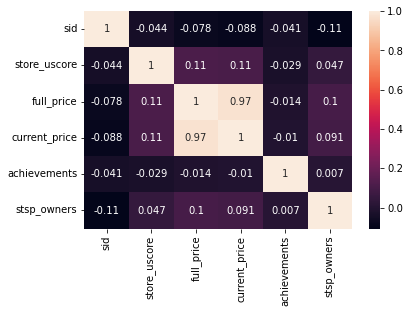

In [17]:
corr = df_genre.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

* No correlation between variables besides the relation between full price and current price

#### Univariate Analysis for Categorical Features

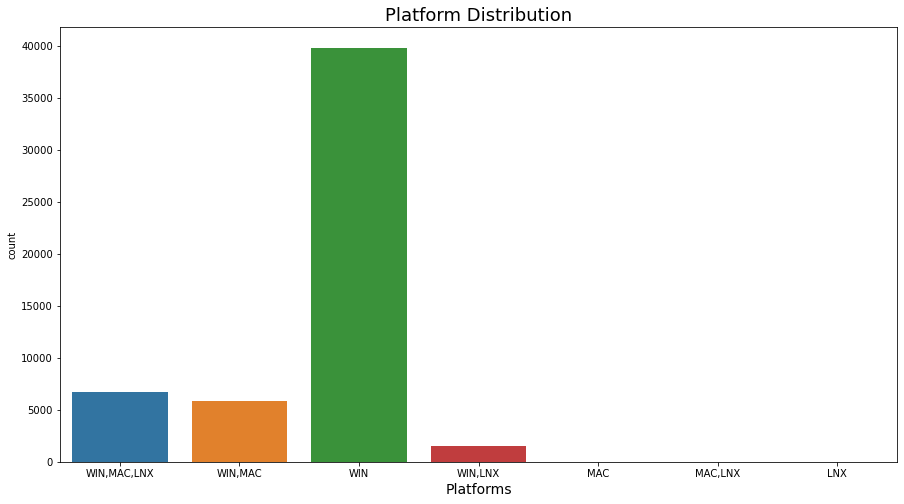

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'platforms', data = df_genre)
plt.title('Platform Distribution',size=18)
plt.xlabel('Platforms',size=14)
plt.show()

In [19]:
df_genre.head()

,sid,store_uscore,published_store,published_hltb,name,description,full_price,current_price,platforms,developers,publishers,languages,voiceovers,categories,genres,achievements,stsp_owners
0,10,97.0,2000-11-01,1999-06-12,Counter-Strike,Play the world's number 1 online action game. ...,999.0,999.0,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain,...","English,French,German,Italian,Spanish - Spain,...","Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,NaN,15000000.0
1,20,84.0,1999-04-01,1999-04-07,Team Fortress Classic,One of the most popular online action games of...,499.0,499.0,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain,...",None,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,NaN,3500000.0
2,30,90.0,2003-05-01,2000-08-04,Day of Defeat,Enlist in an intense brand of Axis vs. Allied ...,499.0,499.0,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain",None,"Multi-player,Valve Anti-Cheat enabled",Action,NaN,7500000.0
3,40,82.0,2001-06-01,2001-06-01,Deathmatch Classic,Enjoy fast-paced multiplayer gaming with Death...,499.0,499.0,"WIN,MAC,LNX",Valve,Valve,"English,French,German,Italian,Spanish - Spain,...",None,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,NaN,7500000.0
4,50,95.0,1999-11-01,1999-11-01,Half-Life: Opposing Force,Return to the Black Mesa Research Facility as ...,499.0,499.0,"WIN,MAC,LNX",Gearbox Software,Valve,"English,French,German,Korean",None,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,NaN,7500000.0


In [20]:
df_genre['published_store'] = pd.to_datetime(df_genre['published_store'])

In [21]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53981 entries, 0 to 53980
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sid              53981 non-null  int64         
 1   store_uscore     33462 non-null  float64       
 2   published_store  53831 non-null  datetime64[ns]
 3   published_hltb   25831 non-null  object        
 4   name             53981 non-null  object        
 5   description      53932 non-null  object        
 6   full_price       46817 non-null  float64       
 7   current_price    46817 non-null  float64       
 8   platforms        53981 non-null  object        
 9   developers       53887 non-null  object        
 10  publishers       53981 non-null  object        
 11  languages        53964 non-null  object        
 12  voiceovers       24180 non-null  object        
 13  categories       53911 non-null  object        
 14  genres           53981 non-null  objec

In [22]:
df_genre['published_store'].dt.year.value_counts()

2020.0    9636
2018.0    8169
2019.0    8014
2021.0    7886
2017.0    6232
2016.0    4312
2022.0    3283
2015.0    2635
2014.0    1589
2013.0     475
2012.0     342
2009.0     332
2011.0     281
2010.0     280
2008.0     167
2007.0     106
2006.0      64
2005.0       7
2004.0       6
2001.0       4
2003.0       3
1999.0       2
1997.0       2
2000.0       2
2002.0       1
1998.0       1
Name: published_store, dtype: int64

## Genre Network

In [23]:
column_edge = 'genres'
column_name = 'name'

data_to_merge = df_genre[[column_name, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

#Connecting games that share the same genre
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_name, column_edge]].rename(columns={column_name:column_name+"_2"}),
    on=column_edge
)

In [24]:
data_to_merge.head(10)

,name,genres,name_2
0,Counter-Strike,Action,Counter-Strike
1,Counter-Strike,Action,Team Fortress Classic
2,Counter-Strike,Action,Day of Defeat
3,Counter-Strike,Action,Deathmatch Classic
4,Counter-Strike,Action,Half-Life: Opposing Force
5,Counter-Strike,Action,Ricochet
6,Counter-Strike,Action,Half-Life
7,Counter-Strike,Action,Counter-Strike: Condition Zero
8,Counter-Strike,Action,Half-Life: Blue Shift
9,Counter-Strike,Action,Half-Life 2


In [25]:
#Removing self connections between games
df_network = data_to_merge[~(data_to_merge[column_name]==data_to_merge[column_name+"_2"])]\
    .dropna()[[column_name,column_name+"_2", column_edge]]

#df_network.drop(df_network.loc[df_network[column_name+"_2"]<df_network[column_name]].index.tolist(), inplace=True)

In [26]:
df_network.head()

,name,name_2,genres
1,Counter-Strike,Team Fortress Classic,Action
2,Counter-Strike,Day of Defeat,Action
3,Counter-Strike,Deathmatch Classic,Action
4,Counter-Strike,Half-Life: Opposing Force,Action
5,Counter-Strike,Ricochet,Action


In [27]:
G = nx.from_pandas_edgelist(df=df_network, source=column_name, target=column_name+"_2", edge_attr=column_edge)

In [28]:
G.add_nodes_from(nodes_for_adding=df_genre.name.tolist())

In [29]:
G.number_of_nodes()

53708

In [30]:
G.number_of_edges()

28444436

In [31]:
np.mean([d for _, d in G.degree()])

1059.2252923214419

In [33]:
nx.density(G)

0.019722294902367325

In [34]:
nx.number_connected_components(G)

1640